In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads_df= pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.shape

(9240, 37)

In [4]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Data Cleaning**

In [6]:
#no. of missing values
leads_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Lead Origin                 

In [7]:
threshold = 3000
leads_df = leads_df.dropna(axis=1, thresh=leads_df.shape[0] - threshold)

In [8]:
leads_df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Do Not Call                                         0
Converted                                           0
Lead Origin                                         0
Total Time Spent on Website                         0
Do Not Email                                        0
Lead Number                                         0
Search                      

In [9]:
#Checking column wise

In [10]:
#Country
leads_df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberi

Most of the leads are from India (data imbalance), So dropping Country column

In [11]:
leads_df.drop(['Country'], axis = 1, inplace = True)

In [12]:
#City value counts
leads_df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Most of the leads are from Mumbai (data imbalance), So dropping City column

In [13]:
leads_df.drop(['City'], axis = 1, inplace = True)

In [14]:
leads_df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Lead Origin                                         0
Lead Number                                         0
Prospect ID                                         0
Converted                                           0
Do Not Call                                         0
Total Time Spent on Website                         0
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [15]:
# checking the value counts of all the columns
for col in leads_df:
    print(leads_df[col].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
fffb0e5e-9f92-4017-9f42-781a69da4154    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
0006d10a-eb01-4ba9-92e2-ad78588b2a40    1
0011be30-fa97-465b-8e44-0ae83dff7eed    1
0011f23e-9fd9-4256-b316-efc2e2639b0d    1
                                       ..
007bd36d-da84-4645-8720-8d481fe79773    1
007c3194-d60e-4a31-a00e-98f93c94bda3    1
008cfab4-dd2d-4cba-8806-d42ffc6bad40    1
008f8176-f95e-4b1b-8d10-b69fa983e57e    1
00976672-4554-4b7c-91a8-c3588f78c8c9    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
660737    1
579533    1
579538    1
579545    1
579546    1
         ..
579830    1
579832    1
579833    1
579836    1
579851    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [16]:
#can drop Prospect ID Lead Number, as they are unique identifiers of no use
leads_df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

Select value is in the columns - Lead profile, How did you hear about X Education, Specialization

In [17]:
# As "Lead Profile" and "How did you hear about X Education" have a lot of rows of value Select which is of no use, those can be dropped
leads_df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

There are a few columns like Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque have one value majorly. Since all of the values for these variables are No, it's best if we drop these columns as they are of no use in analysis

In [18]:
leads_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [19]:
#As 'What matters most to you in choosing a course' have most of the values as 'Better Career Prospects', we can drop the column
leads_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [20]:
# Checking null values count again
leads_df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column 'What is your current occupation' has lot of null values, let's remove the rows having null values.

In [21]:
leads_df = leads_df[~pd.isnull(leads_df['What is your current occupation'])]

In [22]:
# Checking null values count again
leads_df.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Converted                                   0
Lead Origin                                 0
Do Not Email                                0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [23]:
# Dropping the null values rows in the column 'TotalVisits'
leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [24]:
# Checking null values count again
leads_df.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Do Not Email                               0
Lead Origin                                0
Converted                                  0
TotalVisits                                0
Page Views Per Visit                       0
Total Time Spent on Website                0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [25]:
# Dropping the null values rows in the column 'Lead Source'
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]

In [26]:
# Checking null values count again
leads_df.isnull().sum().sort_values(ascending=False)

Specialization                            18
Lead Origin                                0
Do Not Email                               0
Lead Source                                0
Converted                                  0
TotalVisits                                0
Page Views Per Visit                       0
Total Time Spent on Website                0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [27]:
# Drop the null values rows in the column 'Specialization'
leads_df = leads_df[~pd.isnull(leads_df['Specialization'])]

In [28]:
# Checking null values count again
leads_df.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [29]:
leads_df.shape

(6373, 12)

**Dummy Variable**

In [30]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

In [31]:
# Creating dummy variables for categorical features
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [32]:
# 'Specialization' has'Select' value which is useless for the analysis so we
# so create dummy variable and drop the 'Select' dummy variable
dummy_spl = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization', dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads_df = pd.concat([leads_df, dummy_spl], axis = 1)

In [33]:
# Dropping the variables for which the dummy variables have been created in leads_df
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']
                         , axis=1)

In [34]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
leads_df.shape

(6373, 75)

**Train-Test split**

In [36]:
#target variable - converted
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Spliting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [39]:
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


**Scaling**

In [40]:
# Scaling the numeric features present in the dataset - X train

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


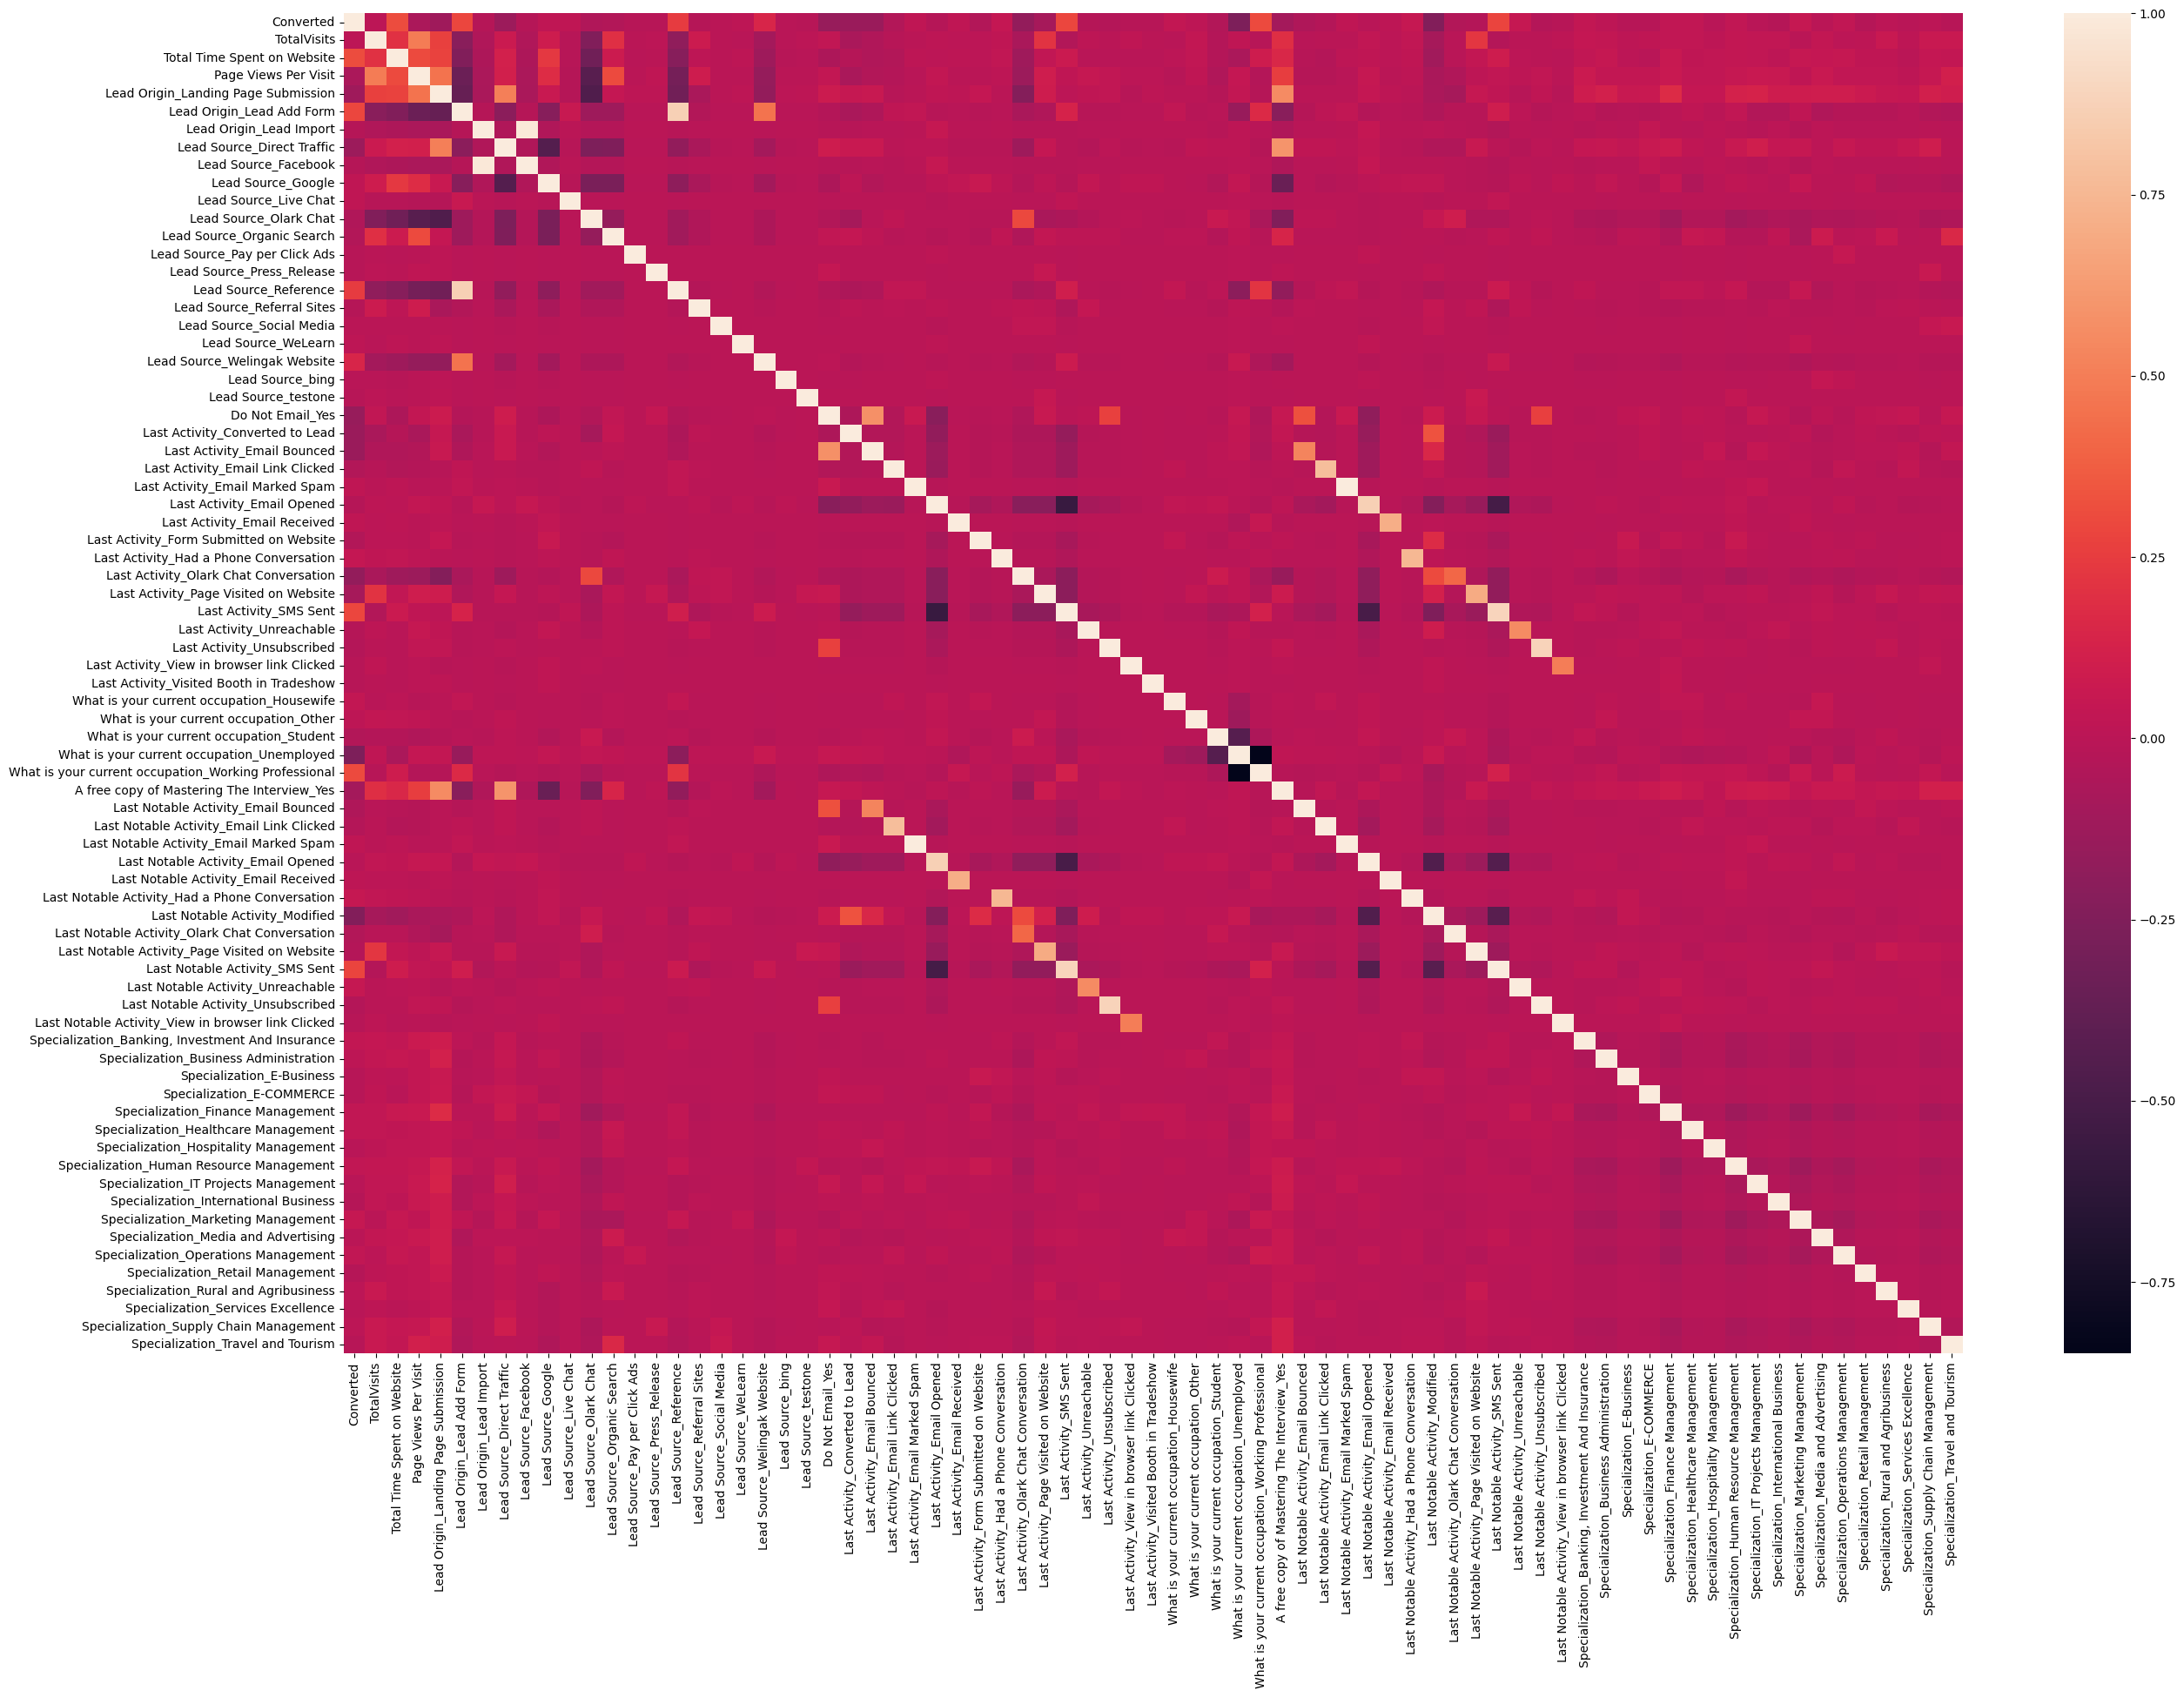

In [41]:
#Correlation
plt.figure(figsize = (30,20))
sns.heatmap(leads_df.corr())
plt.show()

In [42]:
print(leads_df.corr())

                                        Converted  TotalVisits  \
Converted                                1.000000     0.005651   
TotalVisits                              0.005651     1.000000   
Total Time Spent on Website              0.313338     0.202551   
Page Views Per Visit                    -0.063362     0.489039   
Lead Origin_Landing Page Submission     -0.117563     0.267954   
...                                           ...          ...   
Specialization_Retail Management        -0.018603     0.014223   
Specialization_Rural and Agribusiness    0.006964     0.068015   
Specialization_Services Excellence      -0.005142     0.015114   
Specialization_Supply Chain Management   0.005785     0.063383   
Specialization_Travel and Tourism       -0.011762     0.064384   

                                        Total Time Spent on Website  \
Converted                                                  0.313338   
TotalVisits                                                0.2025

**Model building**

In [43]:
logreg = LogisticRegression()

selecting 15 features using RFE

In [44]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.True_, np.int64(1)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(22)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(9)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(48)),
 ('Lead Source_Direct Traffic', np.False_, np.int64(23)),
 ('Lead Source_Facebook', np.False_, np.int64(54)),
 ('Lead Source_Google', np.False_, np.int64(36)),
 ('Lead Source_Live Chat', np.False_, np.int64(45)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(35)),
 ('Lead Source_Pay per Click Ads', np.False_, np.int64(43)),
 ('Lead Source_Press_Release', np.False_, np.int64(52)),
 ('Lead Source_Reference', np.True_, np.int64(1)),
 ('Lead Source_Referral Sites', np.False_, np.int64(37)),
 ('Lead Source_Social Media', np.False_, np.int64(59)),
 ('Lead Source_WeLearn', np.False_, np.int64(44)),
 ('Lead Source_We

In [45]:
#selecting the features on RFE to col variable
col = X_train.columns[rfe.support_]

**Model building using statsmodel**

model 1

In [46]:
# Creating X train dataframe with RFE Selected Variables
X_train = X_train[col]

In [47]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 17 Nov 2024   Deviance:                       4145.5
Time:                        16:18:16   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [48]:
 #VIF check
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


Let's drop the Lead Source_Reference feature since it has a high p-value as well as a high VIF.

In [49]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

model 2

In [50]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 17 Nov 2024   Deviance:                       4146.5
Time:                        16:18:16   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [51]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


All features' VIF value is lessthan 5. So droppping a feature with high p-value - Last Notable Activity_Had a Phone Conversation

In [52]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

model 3

In [53]:
# Refit the model with the new set of features
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 17 Nov 2024   Deviance:                       4152.2
Time:                        16:18:17   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

VIF is already lessthan 5, considering p-value dropping 'What is your current occupation_Housewife'

In [54]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

model 4

In [55]:
# Refit the model with the new set of features
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 17 Nov 2024   Deviance:                       4156.7
Time:                        16:18:17   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

considering p-value dropping 'What is your current occupation_Working Professional' with high p-value

In [56]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

model 5

In [57]:
# Refit the model with the new set of features
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 17 Nov 2024   Deviance:                       4158.1
Time:                        16:18:17   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [58]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


**Model Evaluation**

In [59]:
#Prediction -- predict()
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [60]:
# Creating a dataframe to compare actual converted value vs predicted converted
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Pred_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Pred_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [61]:
#If Conversion_pred >0.5 make predicted converted_pred =1 else converted_pred=0
y_train_pred_final['Converted_Pred'] = y_train_pred_final.Conversion_Pred_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred_Prob,Converted_Pred
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Model evaluation using Converted_Pred

In [62]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [63]:
#accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
accuracy

0.7886124187401928

In [64]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [65]:
#sensitivity
sensitivity = TP/(TP+FN)
sensitivity

np.float64(0.739413680781759)

In [66]:
#specificity
specificity = TN/(TN+FP)
specificity

np.float64(0.8343425605536332)

In [67]:
#Function for ROC curve
def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

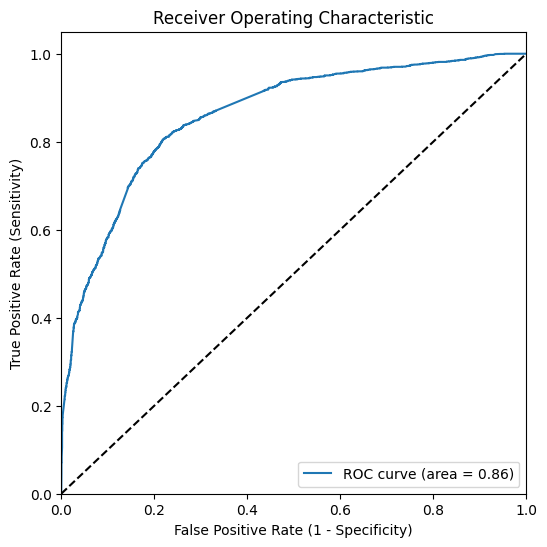

In [68]:
#Plotting ROC curve
fpr, tpr, thresholds= metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred, drop_intermediate = False )
roc_plot(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred_Prob)

Finding Optimal Probability Cutoff Point

In [69]:
#create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Pred_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred_Prob,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [70]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    plot_df.loc[i] =[ i ,accuracy,sensi,speci]
print(plot_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.481731     1.000000     0.000000
0.1   0.1  0.527012     0.994416     0.092561
0.2   0.2  0.698274     0.944160     0.469723
0.3   0.3  0.767541     0.865984     0.676038
0.4   0.4  0.791975     0.810610     0.774654
0.5   0.5  0.788612     0.739414     0.834343
0.6   0.6  0.757229     0.624011     0.881055
0.7   0.7  0.735037     0.543509     0.913062
0.8   0.8  0.711500     0.453234     0.951557
0.9   0.9  0.644026     0.279665     0.982699


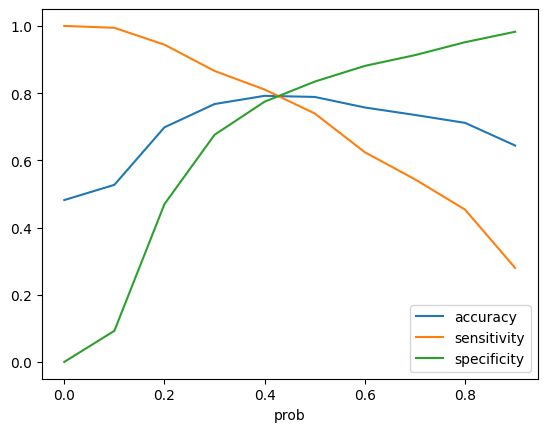

<Figure size 100x100 with 0 Axes>

In [71]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs
plot_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.figure(figsize=(1, 1))
plt.show()

around 0.42, we get the optimal values of the three metrics. So let's choose 0.42 as our cutoff.

In [72]:
y_train_pred_final['Coverted_predicted_final'] = y_train_pred_final.Conversion_Pred_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred_Prob,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Coverted_predicted_final
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [73]:
#accuracy with cutoff 0.42
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Coverted_predicted_final)

0.7908540685944856

In [74]:
#confusion matrix
confusion1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Coverted_predicted_final)
confusion1

array([[1823,  489],
       [ 444, 1705]])

In [75]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [76]:
#sensitivity
sensitivity1 = TP/(TP+FN)
sensitivity1

np.float64(0.793392275476966)

In [77]:
#specificity
specificity1 = TN/(TN+FP)
specificity1

np.float64(0.7884948096885813)

**Predictions on test data**

In [78]:
# Scaling the numeric features present in the dataset - X_test
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [79]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [80]:
# Dropping the unwanted columns from X_test
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional',
                     'Last Notable Activity_Had a Phone Conversation'], axis=1,
                                inplace = True)

In [81]:
# Make predictions on the test set
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [82]:
# Converting y_pred to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [83]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [84]:
y_pred_1.reset_index(drop=True, inplace=True)  # Remove index for both dataframes to append them side by side
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [85]:
#Renaming 0 column in y_pred_final to Conversion_Pred_Prob
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Pred_Prob'})

In [86]:
# Making predictions on the test data with 0.42 as cutoff
y_pred_final['Coverted_predicted_final'] = y_pred_final.Conversion_Pred_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Pred_Prob,Coverted_predicted_final
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [87]:
#accuracy on predicted data
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Coverted_predicted_final)

0.7845188284518828

In [88]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Coverted_predicted_final )
confusion2

array([[786, 210],
       [202, 714]])

In [89]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print(TP / float(TP+FN)) #sensitivity
print(TN / float(TN+FP))#specificity

0.7794759825327511
0.7891566265060241


Precision & Recall

In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [91]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.8057809330628803)

In [92]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

np.float64(0.739413680781759)

Precision & Recall tradeoff

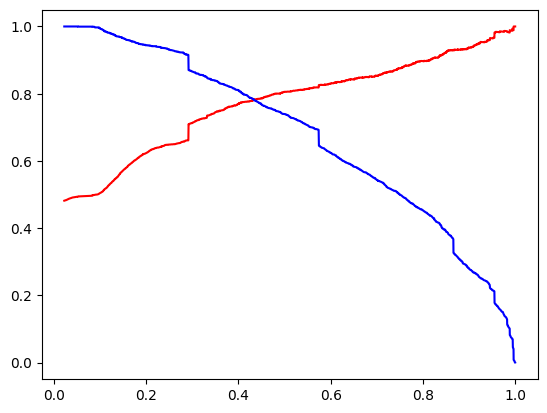

<Figure size 100x100 with 0 Axes>

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred_Prob)
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.figure(figsize=(1, 1))
plt.show()

In [94]:
#considering cutoff 0.44
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Pred_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred_Prob,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Coverted_predicted_final,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1,1


In [95]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) #accuracy

0.7895090786819099

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)
print(confusion[1,1]/(confusion[0,1]+confusion[1,1])) #precision
print(confusion[1,1]/(confusion[1,0]+confusion[1,1])) #recall

[[1852  460]
 [ 479 1670]]
0.784037558685446
0.7771056305258259


Cutoff=0.44

Prediction on test set

In [97]:
#y_test_pred
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [98]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [100]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [102]:
# Rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Pred_Prob'})
# Making predictions on the test data with cutoff 0.44
y_pred_final['final_predicted'] = y_pred_final.Conversion_Pred_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Pred_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [103]:
#accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [104]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
print(confusion)

[[801 195]
 [213 703]]


In [105]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(TP/(TP+FP)) #precision
print(TP/(TP+FN))#recall

0.7828507795100222
0.767467248908297


With cutoff = 0.44,

accuracy = 79%, precision = 78%, recall = 77%


Features which would matter the most are
- TotalVisits
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Lead Source_Olark Chat
- Lead Source_Welingak Website
- Do Not Email_Yes
- Last Activity_Had a Phone Conversation
- Last Activity_SMS Sent
- What is your current occupation_Student
- What is your current occupation_Unemployed
- Last Notable Activity_Unreachable